In [1]:
from statsmodels.stats.proportion import proportion_confint

In [25]:
#считаем доверительный нормальный интервал для майя
import scipy.stats as sts
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sts.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

normal_interval = my_proportion_confint(1, 50, method='normal')

normal_interval

(-0.018805307081790987, 0.05880530708179099)

In [4]:
#считаем доверительный интервал Уилсона для майя

wilson_interval = proportion_confint(1, 50, method='wilson')

wilson_interval

(0.003539259271646236, 0.10495443589637815)

In [10]:
#считаем необходимое количество людей в выборке, для того, чтобы построить интервал с точностью +-0.01

import numpy as np
from statsmodels.stats.proportion import samplesize_confint_proportion
n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))
n_samples

753

9604


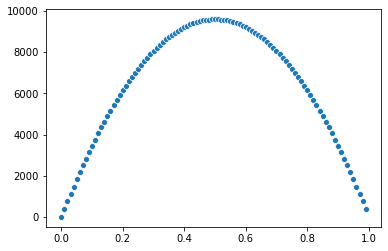

In [20]:
#строим график зависимости количества людей для выборки от параметра p для интервала с +-0.01 точностью

import matplotlib.pyplot as plt
import seaborn as sns

p = np.arange(0, 1, 0.01)
samples = np.array([int(np.ceil(samplesize_confint_proportion(i, 0.01))) for i in p])
sns.scatterplot(p, samples);
print(np.max(samples))